In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
BASE = "/home/ivan/foggysight_for_release"

In [3]:
def draw_results(results, title=""):
    nonzero_subset = results[results.decoys_vs_clean > 0]
    
    fig, ax = plt.subplots()
    
    ### Draw the cases with decoys as a function of the proportion of decoys to clean images
    fig = sns.lineplot(
        data=nonzero_subset, x="decoys_vs_clean", y="recall", style="epsilon", markers=True, ax=ax)

    ### Draw the epsilon=0.0/no decoys case as a straight line with a confidence interval
    # determine the range of the x axis (decoys_vs_clean), for the matplotlib plot function
    min_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.min())
    max_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.max())
    x_range = range(min_decoys_vs_clean, max_decoys_vs_clean + 1)
    
    # determine the mean recall of the epsilon = 0.0 subset
    mean_clean_recall = np.mean(results[results.decoys_vs_clean <= 0.0]["recall"])
    # repeat it for the x range so that it gets drawn as a straight line
    y_mean = [mean_clean_recall for _ in x_range]
    
    # determine the 95% confidence interval
    std_clean_recall = np.std(results[results.decoys_vs_clean <= 0.0]["recall"])
    n_clean_recall = len(results[results.decoys_vs_clean <= 0.0]["recall"])
    confidence_bound = 1.96 * (std_clean_recall/np.sqrt(n_clean_recall))

    # fill the confidence interval for the range
    fig.plot(
        x_range,
        y_mean,
        color='r'
    )
    fig.fill_between(
        x_range,
        (y_mean - confidence_bound), 
        (y_mean + confidence_bound), 
        color='r',
        alpha=.1
    )
    fig.set_title(title)

def get_path(network_to_evaluate, attack_name, k=1):
    return os.path.join(
        BASE, 
        "results/recall_at_{k}_{attack_name}_{network_to_evaluate}.csv".format(
            network_to_evaluate=network_to_evaluate,
            attack_name=attack_name,
            k=k
    ))

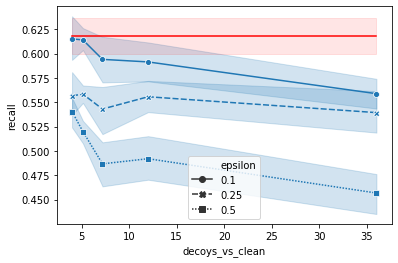

In [4]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

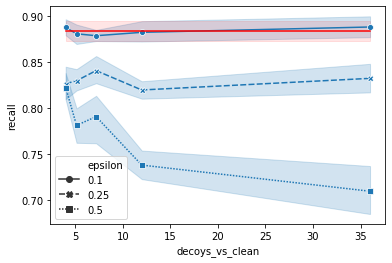

In [5]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

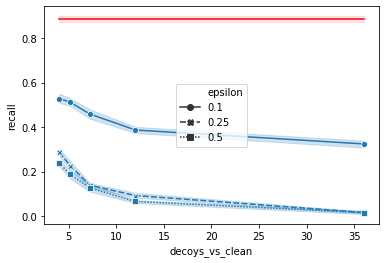

In [6]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_vggface2")))

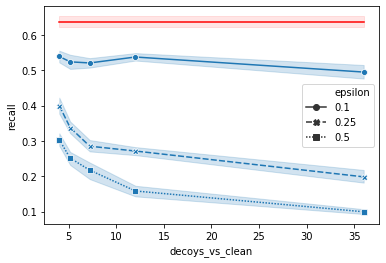

In [7]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_vggface2")))

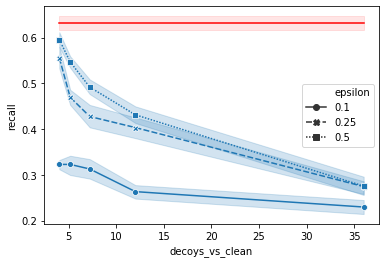

In [8]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_casia-webface")))

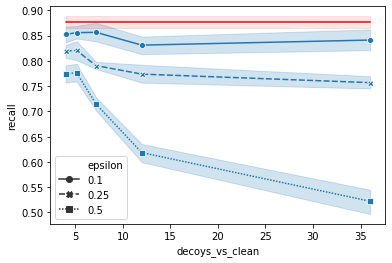

In [9]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_casia-webface")))

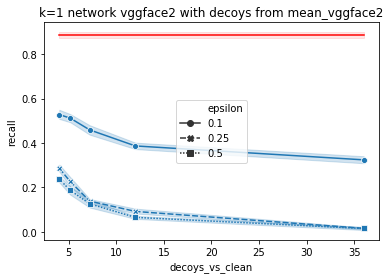

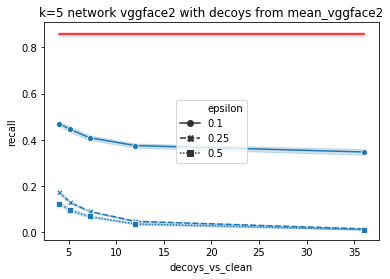

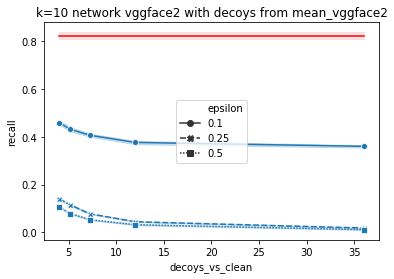

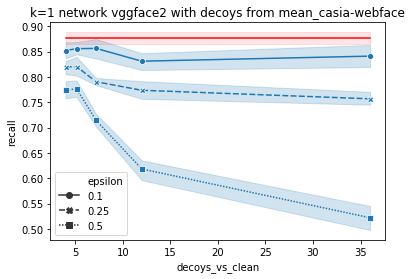

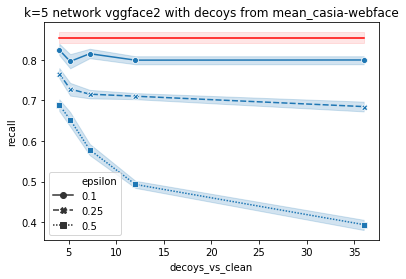

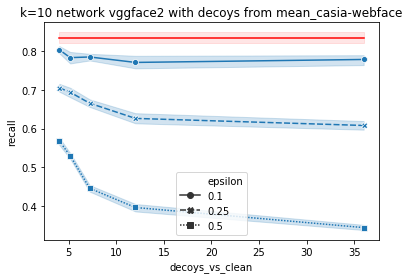

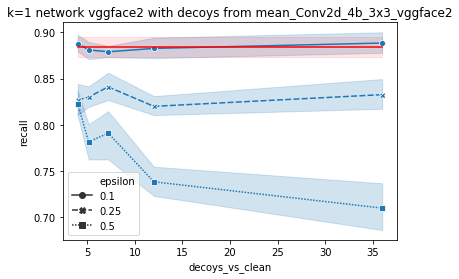

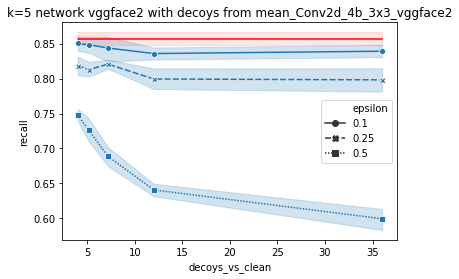

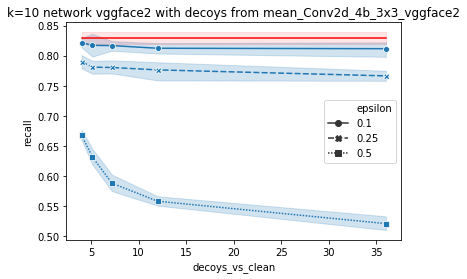

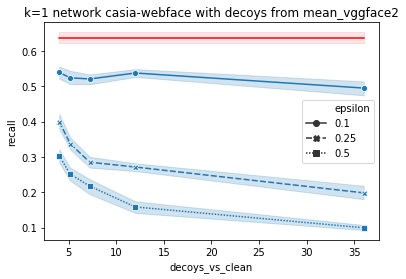

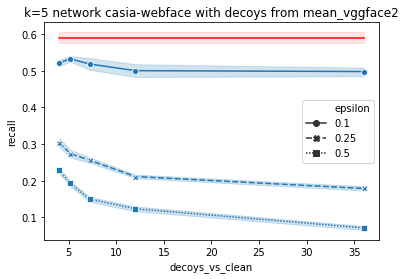

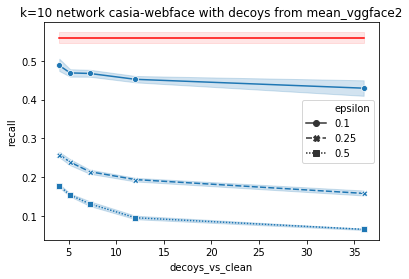

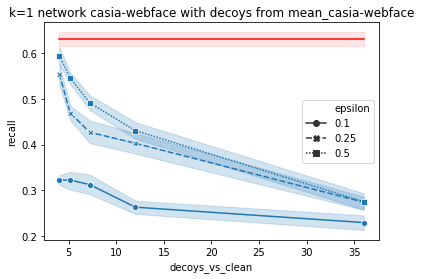

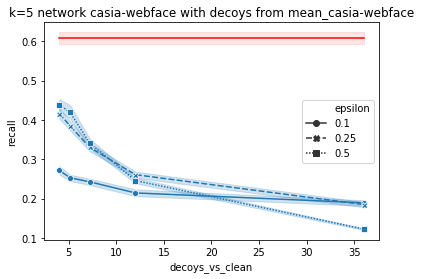

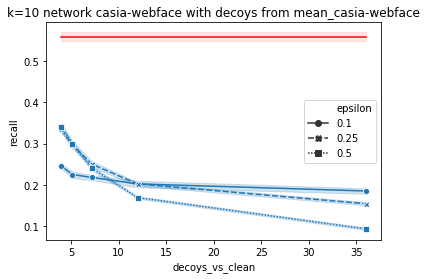

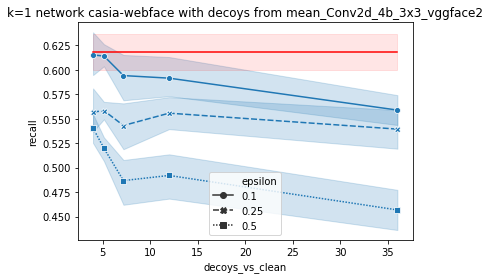

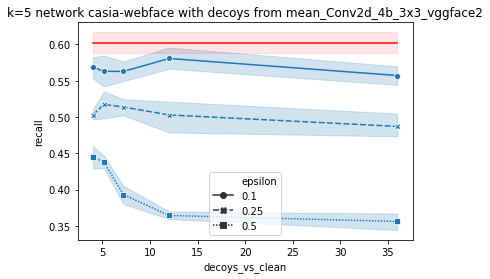

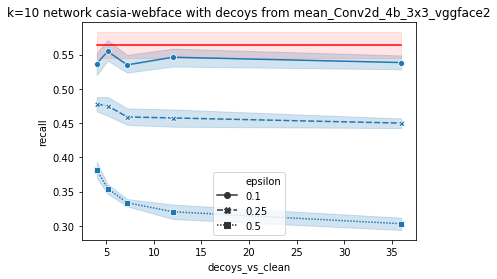

In [10]:
for network_to_evaluate in ["vggface2", "casia-webface"]:
    for attack in ["mean_vggface2", "mean_casia-webface", "mean_Conv2d_4b_3x3_vggface2"]:
        for k in [1, 5, 10]:
            draw_results(
                pd.read_csv(get_path(
                    network_to_evaluate=network_to_evaluate, 
                    attack_name=attack,
                    k=k
                )),
                "k={k} network {network} with decoys from {attack}".format(
                    k=k, network=network_to_evaluate, attack=attack)
            )

In [11]:
df = pd.read_csv(os.path.join(BASE, "results/azure_recall_mean_vggface2.csv"))
df["decoys_vs_clean"] = 36 / df["num_clean"]

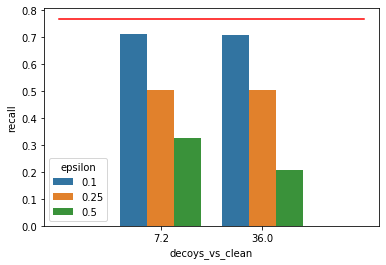

In [12]:
fig = sns.barplot(data=df, x="decoys_vs_clean", y="recall", hue="epsilon")
fig.plot(range(-1, 3), [0.769 for _ in range(-1, 3)], color='r')

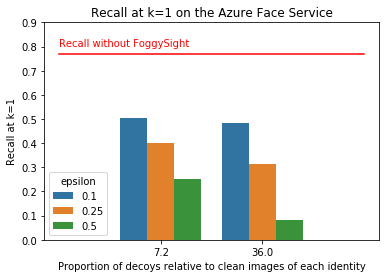

In [13]:
df = pd.read_csv(os.path.join(BASE, "results/azure_recall_ensemble_casia-webface.csv"))
df["decoys_vs_clean"] = 36 / df["num_clean"]
ax = sns.barplot(data=df, x="decoys_vs_clean", y="recall", hue="epsilon")
ax.set(
    xlabel='Proportion of decoys relative to clean images of each identity', 
    ylabel='Recall at k=1',
    title="Recall at k=1 on the Azure Face Service",
)
ax.set_ylim(0.0, 0.9)
ax.text(-1, 0.8, "Recall without FoggySight", color='r')
ax.plot(range(-1, 3), [0.769 for _ in range(-1, 3)], color='r', label="clean")

In [14]:
df = pd.read_csv(os.path.join(BASE, "results/azure_recall_mean_vggface2.csv"))
df["decoys_vs_clean"] = 36 / df["num_clean"]

In [15]:
df

,Unnamed: 0,epsilon,num_clean,recall,decoys_vs_clean
0,0,0.10,1,0.707865,36.0
1,1,0.10,5,0.711111,7.2
2,2,0.25,1,0.505495,36.0
3,3,0.25,5,0.505495,7.2
4,4,0.50,1,0.206522,36.0
5,5,0.50,5,0.325581,7.2


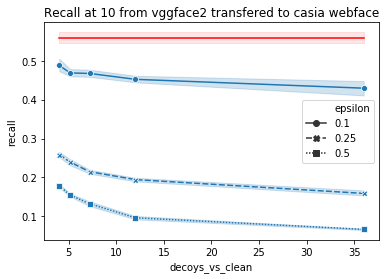

In [16]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_10_mean_vggface2_casia-webface.csv")),
    "Recall at 10 from vggface2 transfered to casia webface"
)

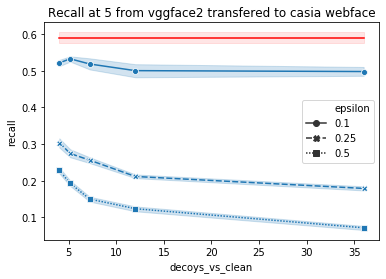

In [17]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_5_mean_vggface2_casia-webface.csv")),
    "Recall at 5 from vggface2 transfered to casia webface"
)

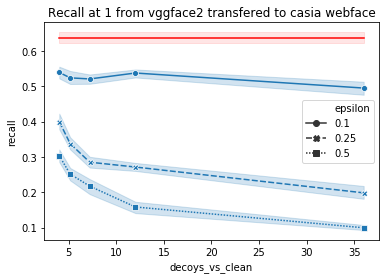

In [18]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_1_mean_vggface2_casia-webface.csv")),
    "Recall at 1 from vggface2 transfered to casia webface"
)

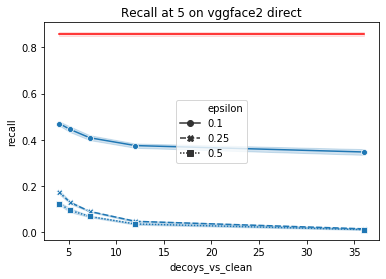

In [19]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_5_mean_vggface2_vggface2.csv")),
    "Recall at 5 on vggface2 direct"
)

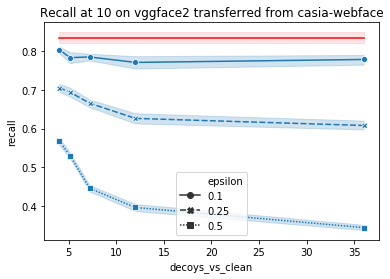

In [20]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_10_mean_casia-webface_vggface2.csv")),
    "Recall at 10 on vggface2 transferred from casia-webface"
)

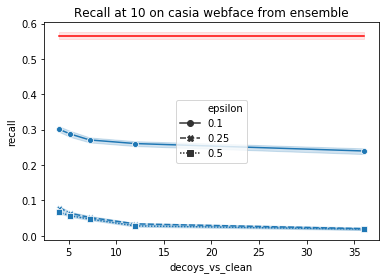

In [21]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_10_ensemble_casia-webface_casia-webface.csv")),
    "Recall at 10 on casia webface from ensemble")

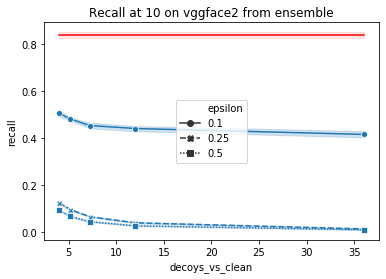

In [22]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_10_ensemble_casia-webface_vggface2.csv")),
    "Recall at 10 on vggface2 from ensemble")

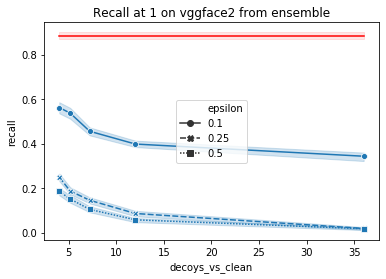

In [23]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_1_ensemble_casia-webface_vggface2.csv")),
    "Recall at 1 on vggface2 from ensemble")

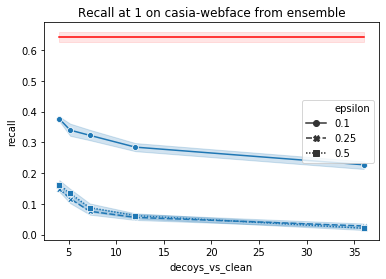

In [24]:
draw_results(
    pd.read_csv(os.path.join(BASE, "results/recall_at_1_ensemble_casia-webface_casia-webface.csv")),
    "Recall at 1 on casia-webface from ensemble")

In [25]:
def draw_transfer(epsilon, k=1):
    v2v = pd.read_csv(
        os.path.join(BASE, "results/recall_at_{k}_mean_vggface2_vggface2.csv".format(k=k)))
    v2v['evaluated_network'] = 'vggface2'
    v2v['generation_network'] = 'vggface2'

    c2c = pd.read_csv(
        os.path.join(BASE, "results/recall_at_{k}_mean_casia-webface_casia-webface.csv".format(k=k)))
    c2c['evaluated_network'] = 'casia-webface'
    c2c['generation_network'] = 'casia-webface'

    v2c =  pd.read_csv(
        os.path.join(BASE, "results/recall_at_{k}_mean_vggface2_casia-webface.csv".format(k=k)))
    v2c['evaluated_network'] = 'casia-webface'
    v2c['generation_network'] = 'vggface2'

    c2v = pd.read_csv(
        os.path.join(BASE, "results/recall_at_{k}_mean_casia-webface_vggface2.csv".format(k=k)))
    c2v['evaluated_network'] = 'vggface2'
    c2v['generation_network'] = 'casia-webface'

    big = pd.concat((
        v2v,
        v2c,
        c2c,
        c2v
    ))
    big["decoys_vs_clean"] = 36 / big["num_clean"]
    
    big['method'] = [
        'transfer' if x != y else 'direct' for x, y in zip(big.evaluated_network, big.generation_network)
    ]
    
    fig = sns.lineplot(data=big[big.epsilon==epsilon], x="decoys_vs_clean", y="recall", hue="method")
    
    results = big
    nonzero_subset = big[big.decoys_vs_clean > 0]
    ### Draw the epsilon=0.0/no decoys case as a straight line with a confidence interval
    # determine the range of the x axis (decoys_vs_clean), for the matplotlib plot function
    min_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.min())
    max_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.max())
    x_range = range(min_decoys_vs_clean, max_decoys_vs_clean + 1)
    
    # determine the mean recall of the epsilon = 0.0 subset
    mean_clean_recall = np.mean(results[results.decoys_vs_clean <= 0.0]["recall"])
    # repeat it for the x range so that it gets drawn as a straight line
    y_mean = [mean_clean_recall for _ in x_range]
    
    # determine the 95% confidence interval
    std_clean_recall = np.std(results[results.decoys_vs_clean <= 0.0]["recall"])
    n_clean_recall = len(results[results.decoys_vs_clean <= 0.0]["recall"])
    confidence_bound = 1.96 * (std_clean_recall/np.sqrt(n_clean_recall))

    # fill the confidence interval for the range
    fig.plot(
        x_range,
        y_mean,
        color='r'
    )
    fig.fill_between(
        x_range,
        (y_mean - confidence_bound), 
        (y_mean + confidence_bound), 
        color='r',
        alpha=.1
    )    
    
    fig.set(
        xlabel='Proportion of decoys relative to clean images of each identity', 
        ylabel='Recall at k={k}'.format(k=k),
        title="Recall at k={k} and epsilon={epsilon} with the EOT algorithm".format(k=k, epsilon=epsilon),
    )
    fig.set_ylim(0.0, 0.9)
    fig.text(4, 0.82, "Recall without FoggySight", color='r')


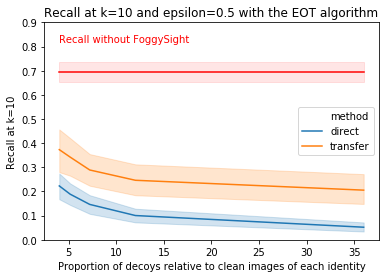

In [26]:
draw_transfer(0.5, k=10)

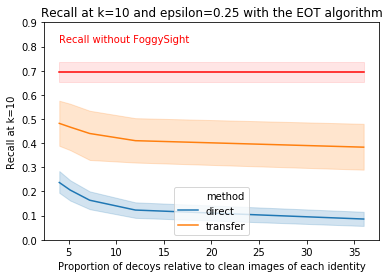

In [27]:
draw_transfer(0.25, k=10)

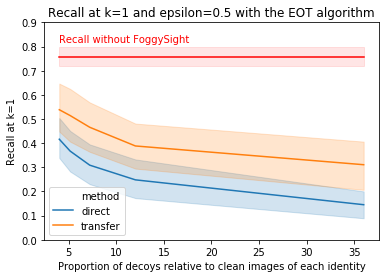

In [28]:
draw_transfer(0.5, k=1)

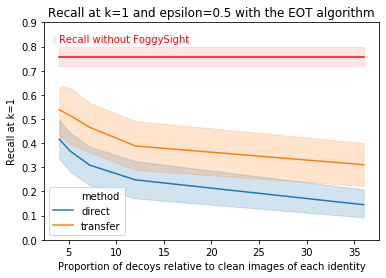

In [29]:
draw_transfer(0.5, k=1)

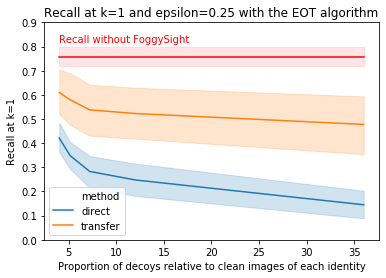

In [30]:
draw_transfer(0.25)

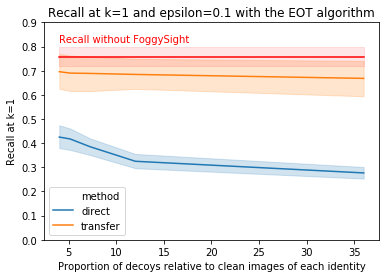

In [31]:
draw_transfer(0.1)

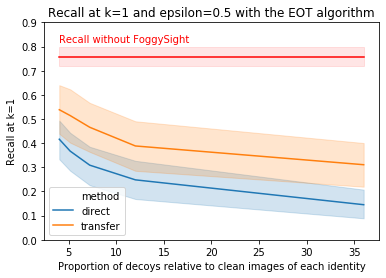

In [32]:
draw_transfer(0.5)

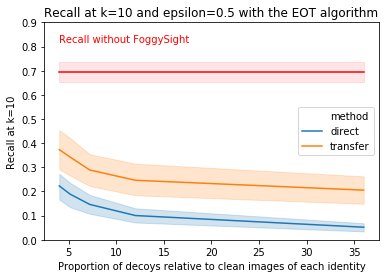

In [33]:
draw_transfer(0.5, k=10)

In [34]:
def draw_transfer_all_k(epsilon):
    super_big = []
    for k in [1, 5, 10]:
        v2v = pd.read_csv(
            os.path.join(BASE, "results/recall_at_{k}_mean_vggface2_vggface2.csv".format(k=k)))
        v2v['evaluated_network'] = 'vggface2'
        v2v['generation_network'] = 'vggface2'

        c2c = pd.read_csv(
            os.path.join(BASE, "results/recall_at_{k}_mean_casia-webface_casia-webface.csv".format(k=k)))
        c2c['evaluated_network'] = 'casia-webface'
        c2c['generation_network'] = 'casia-webface'

        v2c =  pd.read_csv(
            os.path.join(BASE, "results/recall_at_{k}_mean_vggface2_casia-webface.csv".format(k=k)))
        v2c['evaluated_network'] = 'casia-webface'
        v2c['generation_network'] = 'vggface2'

        c2v = pd.read_csv(
            os.path.join(BASE, "results/recall_at_{k}_mean_casia-webface_vggface2.csv".format(k=k)))
        c2v['evaluated_network'] = 'vggface2'
        c2v['generation_network'] = 'casia-webface'

        big = pd.concat((
            v2v,
            v2c,
            c2c,
            c2v
        ))
        big["decoys_vs_clean"] = 36 / big["num_clean"]

        big['method'] = [
            'transfer' if x != y else 'direct' for x, y in zip(big.evaluated_network, big.generation_network)
        ]
        big['k'] = k
        super_big.append(big)
        
    super_big = pd.concat(super_big)
    
    sns.lineplot(data=super_big[super_big.epsilon==epsilon], x="decoys_vs_clean", y="recall", style="k")

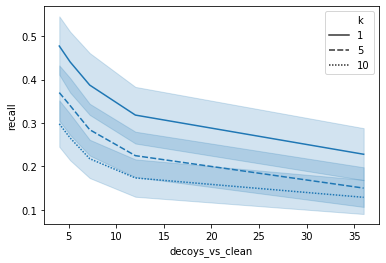

In [35]:
draw_transfer_all_k(0.5)